In [1]:
# import geopandas and matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
# countries data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

**Print the top 5 rows of world dataframe.**

In [3]:
print(world.head())
print(world.dtypes)

     pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
pop_est          int64
continent       object
name            object
iso_a3          object
gdp_md_est     float64
geometry      geometry
dtype: object


**Remove continents which have only one country in dataframe.**


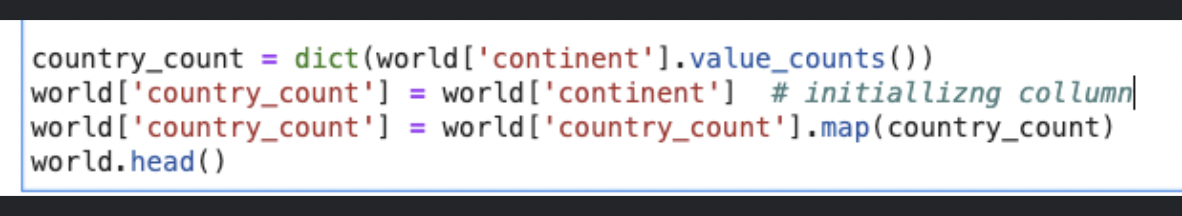

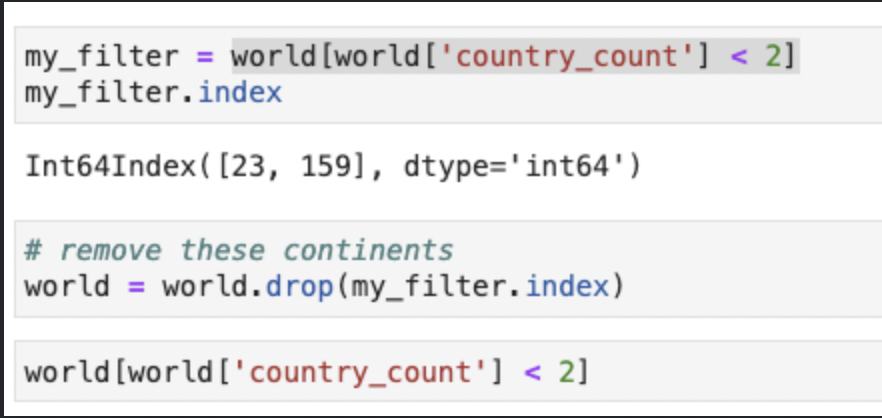


In [4]:
a = world['continent'].value_counts()
smaller_world = world[~world['continent'].isin(a[a < 2].index)]
smaller_world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


**Create dataframe with top 3 most populated countries from each continent and store the result in dataframe with name 'world_filtered'.**


In [5]:
# world_filtered = 
a = world['continent'].value_counts()
unique_continent =set()
for i in world['continent']:
    unique_continent.add(i)

#     pop_est
world_filtered = pd.DataFrame()
for each in unique_continent:
#     print(each)
    world_filtered = world_filtered.append(smaller_world[smaller_world['continent']==each].sort_values('pop_est',ascending = False).head(3))
print(world_filtered)
# df = pd.DataFrame(countrylst)    
# print(df)

        pop_est      continent                      name iso_a3  gdp_md_est  \
18    142257519         Europe                    Russia    RUS   3745000.0   
121    80594017         Europe                   Germany    DEU   3979000.0   
43     67106161         Europe                    France    -99   2699000.0   
4     326625791  North America  United States of America    USA  18560000.0   
27    124574795  North America                    Mexico    MEX   2307000.0   
3      35623680  North America                    Canada    CAN   1674000.0   
29    207353391  South America                    Brazil    BRA   3081000.0   
32     47698524  South America                  Colombia    COL    688000.0   
9      44293293  South America                 Argentina    ARG    879400.0   
139  1379302771           Asia                     China    CHN  21140000.0   
98   1281935911           Asia                     India    IND   8721000.0   
8     260580739           Asia                 Indon

**Print the 'world_filtered' dataframe.**

-----------------
## Part I: Create a choropleth map of world:

   - First using **Geopandas**
       - Note: Geopandas may not work well on your computers, especially on Windows computers, it is advised to use Google Collab for this assignment. 
   - Second using **Plotly**
       - Note: Plotly may not work well on Jupyter Labs, it is advised to use Jupyter Notebooks or Google Collab for the plotly portion. 


> #### Notes
> * the colors of countries from 'world_filtered' are based on population
> * other countries can stay white

### GeoPandas

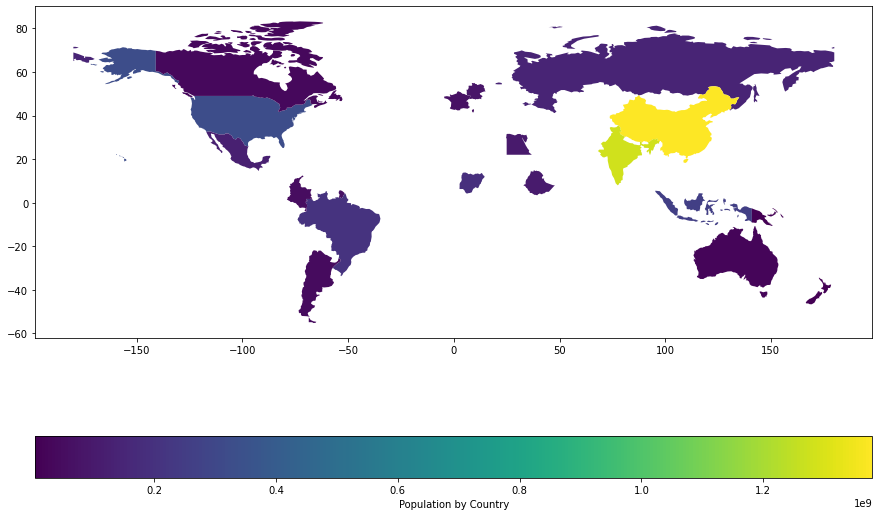

<Figure size 432x288 with 0 Axes>

In [14]:
# create figure and axes


# plot the geometry
# world_filtered.plot()


# create the figure and axes
fig, ax = plt.subplots(figsize=(15,12))

# create the map
world_filtered.plot(column='pop_est', ax=ax, legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})
plt.show()

world.plot(column='pop_est', ax=ax, legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})
plt.show()

### Plotly

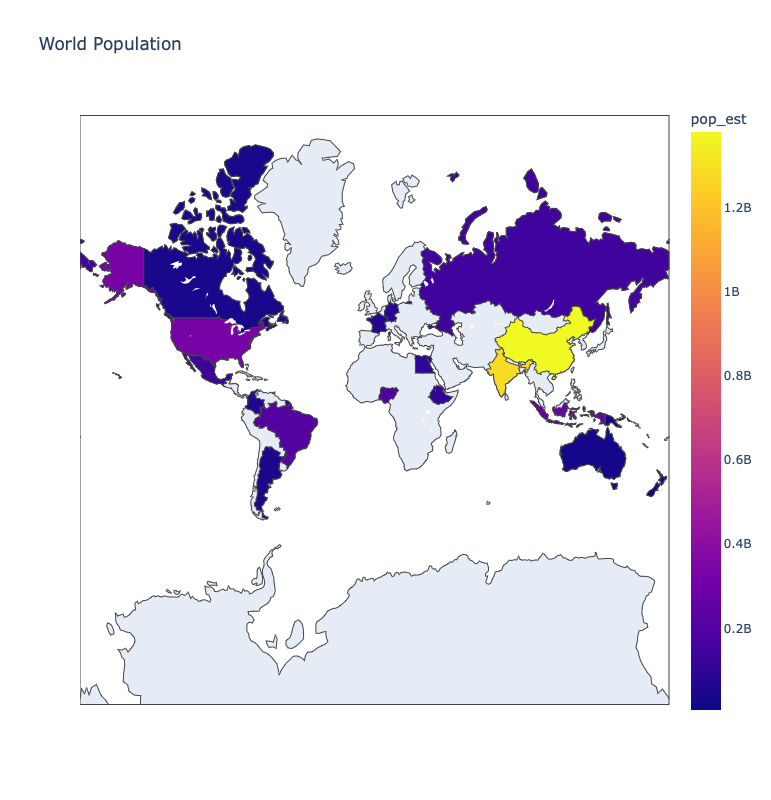

In [27]:



import plotly.express as px
px.choropleth(world_filtered,
              locations='name',
              locationmode='country names', #can be ‘ISO-3’‘USA-states’‘country names’
              color='pop_est',
              projection='mercator', #how the world looks
              scope='world', #‘world’, ‘usa’, ‘europe’, ‘asia’, ‘africa’, ‘north america’, or ‘south america’.
              title='World Population',
              width=800,
                height=800)


-----------
## Part II: More Geopandas

In Geopandas:

* add New York, Berlin, Paris, Toronto, Calgary, Tokyo to the map you have created before
    * to get geometry of these cities use the function, **gpd.tools.geocode**(['New York', 'Berlin', 'Paris','Toronto', 'Calgary', 'Tokyo'])
    * if you do not have the geopy library instaled, install it with the following command **in the jupyter notebook cell** `!pip install geopy` 

                      geometry               address
0   POINT (-74.00714 40.71455)              New York
1    POINT (13.37691 52.51604)                Berlin
2     POINT (2.34140 48.85717)  Paris, Île-de-France
3   POINT (-79.38544 43.64869)      Toronto, Ontario
4  POINT (-114.06301 51.04532)      Calgary, Alberta
5   POINT (139.69172 35.68946)                 Tokyo


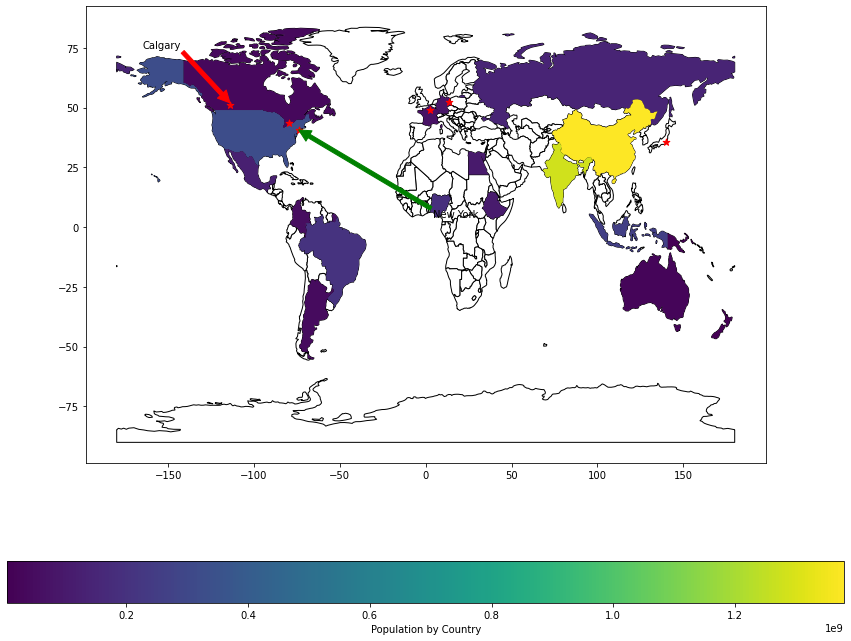

POINT (-74.00713999999994 40.71455000000003)


In [83]:
# import geopandas and matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd 
import geopy
from geopy.geocoders import Nominatim


import geopy
from geopandas.tools import geocode
x = geocode(['New York', 'Berlin', 'Paris','Toronto', 'Calgary', 'Tokyo'], provider = 'arcgis')
print(x)




# create the figure and axes

fig, ax = plt.subplots(figsize=(15,12))

#a layer of black n white countries, all of them.
world.plot(ax=ax, color='white', edgecolor='black')

# a layer of countries of interests
world_filtered.plot(column='pop_est', ax=ax, legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})

# a layer of cities of interests
x.plot(ax=ax ,marker='*', color='red', markersize=50, label="address")
ax.annotate('New York', xy=(-74.00714,40.71455), xytext=(4.25,4.0), arrowprops={'color':'green'})
ax.annotate('Calgary', xy=(-114,52), xytext=(-165,75), arrowprops={'color':'red'})



plt.show()
print(x.geometry[0])




In [73]:
######## ANNOTATIONS ADDED ################
ax.annotate('New York', xy=(x['geometry'][0]),
           xytext=(4.25,4.0), arrowprops={'color':'green'})


Text(4.25, 4.0, 'New York')